Jupyter notebook to do clustering, k-means, on data from image identification. The only required input is an excel file with all the data.

You need to have installed:
* numpy
* pandas
* sklearn
* plotly

In [3]:
%matplotlib inline  

#modules required for analysis
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
import numpy as np
from sklearn.preprocessing import normalize

#Pandas for data manipulation
import pandas as pd

#To standardise
from sklearn.preprocessing import StandardScaler

#For clustering
from sklearn.cluster import KMeans

#For bioactivity predictor model 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

#To plotly
import plotly.express as px

#To heatmap
import plotly.graph_objects as go

#To PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# For sqrt
from math import sqrt

#Metrics
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score

#Plotting
import plotly.express as px


In [4]:
#Contributions to PCA 
def contribution(vector):
    vector_sq  = vector**2
    vector_sq_sum = sum(vector_sq)
    vector_sum = np.true_divide(vector_sq, vector_sq_sum)
    new_vector = [x * y for x, y in zip(vector_sum, np.sign(vector))]
    return new_vector

In [5]:
#Find what datapoints to connect arrows with for the "clustering over time"
def getArrows(data):
    arrows = []
    for i in range(len(data)):
        for j in range(len(data)):
            label1 = data["sample"][i].replace('.tif','')
            label2 = data["sample"][j].replace('.tif','')
            prefix1 = label1[0:label1.rfind('_')]
            prefix2 = label2[0:label2.rfind('_')]
            if prefix1 == prefix2:
                suffix1 = label1[label1.rfind(' ')+1:]
                suffix2 = label2[label2.rfind(' ')+1:]
                if (suffix1 == 'im1' and suffix2 == 'im2') or (suffix1 == 'im2' and suffix2 == 'im3'):
                    arrows.append((i,j))

    return arrows

#Function that draws the scatterplot 
def scatterPlots():
    #Calculates the standard derivation for PCA 
    pc1dev = np.sqrt(stddev**2 @ pca.components_[0]**2)
    pc2dev = np.sqrt(stddev**2 @ pca.components_[1]**2)
    pc3dev = np.sqrt(stddev**2 @ pca.components_[2]**2)
    
    #Save data
    pcvar = pd.DataFrame(data = np.array([pc1dev, pc2dev, pc3dev]).T
                 , columns = ["pc1var", "pc2var", "pc3var"])
    principalDf = pd.DataFrame(data = principalComponents[:, 0:2]
                 , columns = [pc1label, pc2label])
    if plot_stddev:
        print("The 1D plot explains "+str(int(pca.explained_variance_ratio_[0]*100))+"% of the data.")
        print("This 2D plot explains " + str(int((pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])*100))+"% of the data.")
        dataandClusters = pd.concat([dataAll, clustersNum, principalDf, pcvar], axis=1)
        dataandClusters["cluster"] = dataandClusters["cluster"].astype(str)
        fig = px.scatter(dataandClusters, hover_name='sample', x=pc1label, y=pc2label, error_x="pc1var", error_y="pc2var", color="cluster")
        if track_colony_days:
            print("Tracking colony changes.")
            for (i,j) in getArrows(dataandClusters):
                fig.add_annotation(x=principalComponents[j,0],y=principalComponents[j,1],ax=principalComponents[i,0],ay=principalComponents[i,1],axref="x",ayref="y",arrowhead=3,arrowsize=1,arrowwidth=1,arrowcolor='black',showarrow=True,xanchor="center",yanchor="top" if principalComponents[i,1]<principalComponents[j,1] else "bottom")
        else:
            print("Not tracking colony changes.")
        fig.show()
    else:
        print("The 1D plot explains "+str(int(pca.explained_variance_ratio_[0]*100))+"% of the data.")
        print("This 2D plot explains " + str(int((pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])*100))+"% of the data.")
        dataandClusters = pd.concat([dataAll, clustersNum, principalDf], axis=1)
        dataandClusters["cluster"] = dataandClusters["cluster"].astype(str)
        fig = px.scatter(dataandClusters, hover_name='sample', x=pc1label, y=pc2label, color="cluster", color_discrete_map={"0": "#EE553B", "1": "#0ECC96", "2": "#636FFC"})
        if track_colony_days:
            print("Tracking colony changes.")
            for (i,j) in getArrows(dataandClusters):
                fig.add_annotation(x=principalComponents[j,0],y=principalComponents[j,1],ax=principalComponents[i,0],ay=principalComponents[i,1],axref="x",ayref="y",arrowhead=3,arrowsize=1,arrowwidth=1,arrowcolor='black',showarrow=True,xanchor="center",yanchor="top" if principalComponents[i,1]<principalComponents[j,1] else "bottom")
        else:
            print("Not tracking colony changes.")
        fig.show()

        
    #Makes the 3D PCA plot 
    principalDf = pd.DataFrame(data = principalComponents[:, 0:3]
                 , columns = [pc1label, pc2label, pc3label])
    if plot_stddev:
        print("This 3D plot explains " + str(int((pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]++ pca.explained_variance_ratio_[2])*100))+"% of the data.")
        dataandClusters = pd.concat([dataAll, clustersNum, principalDf, pcvar], axis=1)
        dataandClusters["cluster"] = dataandClusters["cluster"].astype(str)
        fig = px.scatter_3d(dataandClusters, x=pc1label, y=pc2label, z=pc3label, error_x="pc1var", error_y="pc2var", error_z="pc3var", color="cluster", opacity=0.7)
        fig.show()
    else:
        print("This 3D plot explains " + str(int((pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]++ pca.explained_variance_ratio_[2])*100))+"% of the data.")
        dataandClusters = pd.concat([dataAll, clustersNum, principalDf], axis=1)
        dataandClusters["cluster"] = dataandClusters["cluster"].astype(str)
        fig = px.scatter_3d(dataandClusters, x=pc1label, y=pc2label, z=pc3label, color="cluster", opacity=0.7)
        fig.show()

# Getting your data

In [6]:
# Input timestamp of the data you want
timestamp = "4_maj_time_travel_alle" #change to your timestamp

dataAll = pd.read_excel('means_'+timestamp+'.xls') 
stddevsAll = pd.read_excel('stddev_'+timestamp+'.xls')

dataAll.reset_index(drop=True, inplace=True)
stddevsAll.reset_index(drop=True, inplace=True)
assert dataAll.shape == stddevsAll.shape

# Selecting number of clusters (k)

For number of cluster selection we need to extract only the morphological features (28 in total) and normalized the values. We will use k-means clustering algorithm. For more information:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html?highlight=k%20means#sklearn.cluster.k_means

In [7]:
#Selection and extraction of features - After this only 28/34 features are included
features = ['peaks', 'height_peaks', 'circularity','eccentricity', 
            'RGB_mean_1', 'RGB_mean_2', 'RGB_mean_3', 'RGB_std_1',
            'RGB_std_2', 'RGB_std_3', 'RGBt_mean_1', 'RGBt_mean_2', 
            'RGBt_mean_3', 'RGBt_std_1', 'RGBt_std_2', 'RGBt_std_3', 
            'Lab_mean_1', 'Lab_mean_2', 'Lab_mean_3', 'Lab_std_1', 
            'Lab_std_2', 'Lab_std_3', 'Labt_mean_1','Labt_mean_2', 
            'Labt_mean_3', 'Labt_std_1', 'Labt_std_2', 'Labt_std_3']
data = dataAll.loc[:,features]
stddevs = stddevsAll.loc[:,features]
assert data.shape == stddevs.shape

In [8]:
#Normalization of data
x = StandardScaler().fit_transform(data)
scaler = StandardScaler(with_mean=False)
scaler.fit(data)
stddev = scaler.transform(stddevs)

## Metrics to define the best number of clusters, (k)

In this example, it seems that the best number of clusters is around 10. We will use this window of number of clusters to go to the next step of the analysis. Here we are using three different metrics:Silhouette Coefficient, Calisnki-Harabasz Index and Davies-Bouldin Index.
The Silhouette Coefficient has a range between -1 and +1, the higher the score the denser and more separated are the clusters. In the case of the Calisnki-Harabasz Index, dense and well separated clusters, compute a higher score. The third index, Davies-Bouldin Index, compares the distance between the clusters - the closer to zero the better the partition. 
For more info: https://scikit-learn.org/stable/modules/clustering.html#davies-bouldin-index

In [9]:
#Keep the window from previous step
m=15
n_clusters = np.arange(2, m, 1) 
#Generate empty arrays to save the values
silhouette_values = np.zeros((10, len(n_clusters)))
calinski_values = np.zeros((10, len(n_clusters)))
davies_values = np.zeros((10, len(n_clusters)))

#Calculate each value for each k 10 times to get the mean at the end
for index, i in enumerate(n_clusters):
    for j in np.arange(10):
        #calculate clusters
        clusters = KMeans(n_clusters=i, random_state=10).fit(x)
        cluster_labels = clusters.labels_
    
        #compute silhouette scores
        silhouette_values[j, index] = metrics.silhouette_score(x, cluster_labels, metric='euclidean')
        calinski_values[j, index] = metrics.calinski_harabasz_score(x, cluster_labels)
        davies_values[j, index] = davies_bouldin_score(x, cluster_labels)

<ErrorbarContainer object of 3 artists>

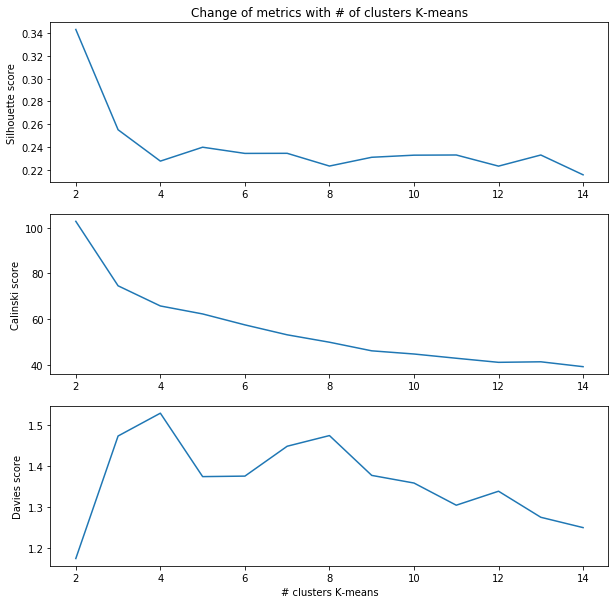

In [10]:
# Plotting the 3 metrics 
plt.figure(figsize=(10,10))

plt.subplot(311)
plt.title('Change of metrics with # of clusters K-means')
plt.ylabel('Silhouette score')
plt.errorbar(n_clusters, silhouette_values.mean(axis=0), yerr=silhouette_values.std(axis=0))

plt.subplot(312)
plt.ylabel('Calinski score')
plt.errorbar(n_clusters, calinski_values.mean(axis=0), yerr=calinski_values.std(axis=0))

plt.subplot(313)
plt.xlabel('# clusters K-means')
plt.ylabel('Davies score')
plt.errorbar(n_clusters, davies_values.mean(axis=0), yerr=davies_values.std(axis=0))

# Clustering

In [11]:
#k value to use, number of clusters
k=3#change
clustering = KMeans(n_clusters=k, random_state=10).fit(x)

d = {'cluster':clustering.labels_}
clustersNum = pd.DataFrame(data=d)

# PCA implementation
For visualization the data needs to be reduce in dimensionallity, where each variable is one dimension. With PCA we can go from 28 dimensions (number of features used for clustering) to 2.

In [12]:
pca = PCA()
principalComponents = pca.fit_transform(x)

# Turn this ON (True) or OFF (False) to display error bars
plot_stddev = False

# Turn this ON (True) or OFF (False) to show how colonies move over time
track_colony_days = True

# Plot

In [14]:
pc1label = "Darkness"
pc2label = "Purpleness"
pc3label = "Polychromaticity"

scatterPlots()

The 1D plot explains 48% of the data.
This 2D plot explains 69% of the data.
Tracking colony changes.


This 3D plot explains 82% of the data.


# Check contribution of features in PCA components

[0.10504714202815718, 0.14940688443066752, -0.02259179637230256, 0.010077944893689893, -0.05034870367550559, -0.03570061149440428, -0.024029067673500097, 0.053798473339259016, 0.06935388353484649, 0.05885145367547895, -0.053240626529379026, -0.03667769640009628, -0.024502353146541703, 0.020970228802464436, 0.02187359392305852, 0.018592177805054434, -0.03982213900315446, -0.0005043034109050872, -0.00662480138117773, 0.094369761921657, -0.0011278847496028522, -0.00023742333552929313, -0.04144453403056421, -0.0024204812567264014, -0.008300380294442907, 0.036444210713838486, -0.01000121496962829, -0.003640227208366998]


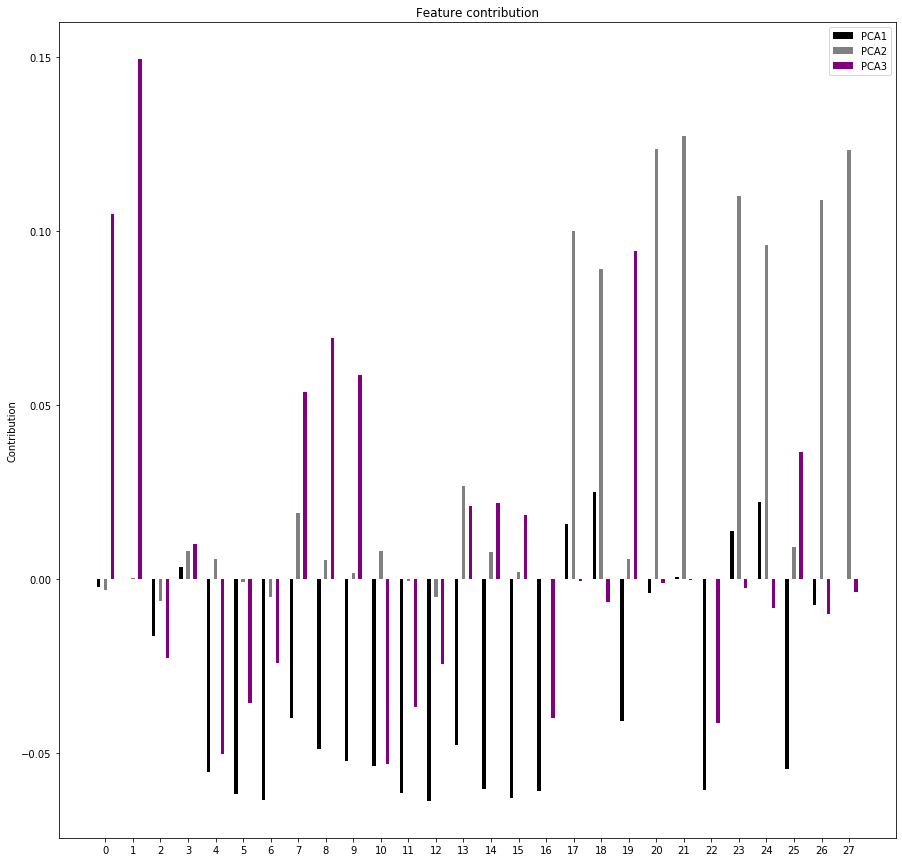

In [15]:
contri_features = pd.DataFrame(pca.components_[0:3, :],columns=features)
pca1_contribution = contribution(contri_features.iloc[0].values)
pca2_contribution = contribution(contri_features.iloc[1].values)
pca3_contribution = contribution(contri_features.iloc[2].values)

print(pca3_contribution)

x = np.arange(len(pca1_contribution))

width = 0.25

#plot contribution
fig, ax = plt.subplots(figsize=(15,15))
pca1_plot = ax.bar(x - width, pca1_contribution, width/2, label='PCA1', color="black")
pca2_plot = ax.bar(x, pca2_contribution, width/2, label='PCA2', color="gray")
pca3_plot = ax.bar(x + width, pca3_contribution, width/2, label='PCA3', color="purple")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Contribution')
ax.set_title('Feature contribution')
ax.set_xticks(x)
ax.legend()

A brief explanation of each varialbe:
* label: generated using the date provided and the colony ID
* sample: file name given to the plate
* ID: colony ID generated by plate# and colony#
* centroid(1,2): x-y coordenates of the colony center in the plate
* peaks: number of identations along the perimeter of the colony
* height_peaks: length (height) of the identations from the colony center
* circularity: the closest to 1 the more circulare the object
* eccentricity: the closest to 1 the more rectangular the object
* RGB_mean: mean values of the whole area. 1=red, 2=green, 3=blue
* RGB_std: standard deviation values of the whole area
* RGBt_mean: mean values of a rectangular area across a colony
* RGBt_std: standard deviation values of a rectangular area across a colony
* Lab is a different color space: L=brightness(1), a=red-green(2), b=blue-yellow(3).

In [16]:
pca1_features = [(feature, round(pca1, 2)) for feature, pca1 
                       in zip(features, pca1_contribution)]
pca1_features_contribution = sorted(pca1_features, key = lambda x: abs(x[1]), reverse = True)
pca2_features = [(feature, round(pca2, 2)) for feature, pca2 
                       in zip(features, pca2_contribution)]
pca2_features_contribution = sorted(pca2_features, key = lambda x: abs(x[1]), reverse = True)
pca3_features = [(feature, round(pca3, 2)) for feature, pca3 
                       in zip(features, pca3_contribution)]
pca3_features_contribution = sorted(pca3_features, key = lambda x: abs(x[1]), reverse = True)
print('PCA1 most important components: ', pca1_features_contribution[0:15])
print('PCA2 most important components: ', pca2_features_contribution[0:15])
print('PCA3 most important components: ', pca3_features_contribution[0:15])

PCA1 most important components:  [('RGB_mean_1', -0.06), ('RGB_mean_2', -0.06), ('RGB_mean_3', -0.06), ('RGBt_mean_2', -0.06), ('RGBt_mean_3', -0.06), ('RGBt_std_2', -0.06), ('RGBt_std_3', -0.06), ('Lab_mean_1', -0.06), ('Labt_mean_1', -0.06), ('RGB_std_2', -0.05), ('RGB_std_3', -0.05), ('RGBt_mean_1', -0.05), ('RGBt_std_1', -0.05), ('Labt_std_1', -0.05), ('RGB_std_1', -0.04)]
PCA2 most important components:  [('Lab_std_3', 0.13), ('Lab_std_2', 0.12), ('Labt_std_3', 0.12), ('Labt_mean_2', 0.11), ('Labt_std_2', 0.11), ('Lab_mean_2', 0.1), ('Labt_mean_3', 0.1), ('Lab_mean_3', 0.09), ('RGBt_std_1', 0.03), ('RGB_std_1', 0.02), ('circularity', -0.01), ('eccentricity', 0.01), ('RGB_mean_1', 0.01), ('RGB_mean_3', -0.01), ('RGB_std_2', 0.01)]
PCA3 most important components:  [('height_peaks', 0.15), ('peaks', 0.11), ('Lab_std_1', 0.09), ('RGB_std_2', 0.07), ('RGB_std_3', 0.06), ('RGB_mean_1', -0.05), ('RGB_std_1', 0.05), ('RGBt_mean_1', -0.05), ('RGB_mean_2', -0.04), ('RGBt_mean_2', -0.04), ('

# Predicting bioactivity

In this section you can use a support vector machine to predict the bioactivity of a new colony based on data on the previous data.

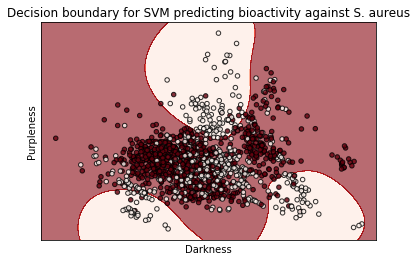

KeyboardInterrupt: 

In [17]:
import math
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from scipy import stats

#Plot Descisionboundary
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

#Plot Descisionboundary
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

#Tranfsforms data into format suitable for SVM
def get_bioactivity_data(dims,timestamp,labels):
    def bioactivity(samples):
        return [(sample[0:len(sample) if not ' ' in sample else sample.index(' ')] in labels) for sample in samples]
    raw_data = pd.read_excel('regression_'+timestamp+'.xls') 
    raw_data.reset_index(drop=True, inplace=True)
    
    extracted_data = raw_data.loc[:,features]
    
    scaled_data = StandardScaler().fit_transform(extracted_data)
    
    X = pca.transform(scaled_data)[:,0:dims]
    
    y = bioactivity(raw_data['sample'])
    
    return X, y, raw_data


Saureus = ['S. aureus', ['100-2-1', '100-2-11', '100-2-14', '100-2-17', '100-3-1', '100-3-6', '20-2-1', '20-2-4', '20-3-7', '20-3-8', '20-4-1', '20-4-4', '20-4-5', '20-5-3', '20-5-5', '40-1-6', '40-2-1', '40-2-2', '40-3-4', '40-3-9', '40-4-10', '40-4-11', '40-4-17', '40-4-9', '40-5-1', '40-5-6', '40-5-7', 'HavSE8', 'Hav55', 'ISP2-15', 'ISP2-10', 'ISP2-6', 'ISP2-9', 'ISP2-3', 'ISP2-1', 'ISP2-7']]
Ecoli   = ['E. coli', ['Hav55', 'ISP2-4', 'ISP2-12', 'ISP2-9', 'ISP2-14']]


# Settings for model
num = 10000
dims = 2
bacteria = Saureus
test_set = 0.30

# Initialize and fit model
model = svm.SVC(probability=True)
scores = []
X,y,raw_data = get_bioactivity_data(dims,'2021_05_04_16_38_25',bacteria[1])
k = test_set * len(y)
for i in range(num):
    # Split data into test data and train data
    X_train, X_test, y_train, y_test, raw_data_train, raw_data_test = train_test_split(X, y, raw_data, test_size=test_set)

    # Fit model
    model.fit(X_train,y_train)

    #Plot model 
    if i==0 and dims == 2:
        fig, ax = plt.subplots()
        # title for the plots
        title = ('Decision boundary for SVM predicting bioactivity against '+bacteria[0])
        # Set-up grid for plotting.
        X0, X1 = X[:, 0], X[:, 1]
        xx, yy = make_meshgrid(X0, X1)

        plot_contours(ax, model, xx, yy, cmap=plt.cm.Reds, alpha=0.6)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.Reds, alpha=0.8, s=20, edgecolors='k')
        ax.set_ylabel('Purpleness')
        ax.set_xlabel('Darkness')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
        plt.show()

    # Evaluate model on test data
    score = model.score(X_test, y_test)
    scores.append(score)

accuracy = sum(scores)/len(scores)
pvalue = stats.binom_test((accuracy)*k, n=k, p=max(1-sum(y)/len(y), sum(y)/len(y)))

print('Output of SVM classifier on '+bacteria[0])
print('#principal components: ',dims)
print('E_out', accuracy)
print('pvalue (in %)', pvalue*100)
print('This is ' + ('significant. We REJECT the hypothesis that it is no better than guessing the same for all.' if pvalue < 0.05 else 'NOT significant. We CANNOT REJECT the hypothesis that our model is no better than guessing the same for all.'))

# blå = bioaktivitet
# rød = ingen bioaktivitet

# Phylogenetic analysis

In [18]:
from Bio import Phylo
from Bio.Phylo import PhyloXML as PX
import matplotlib
import matplotlib.pyplot as plt

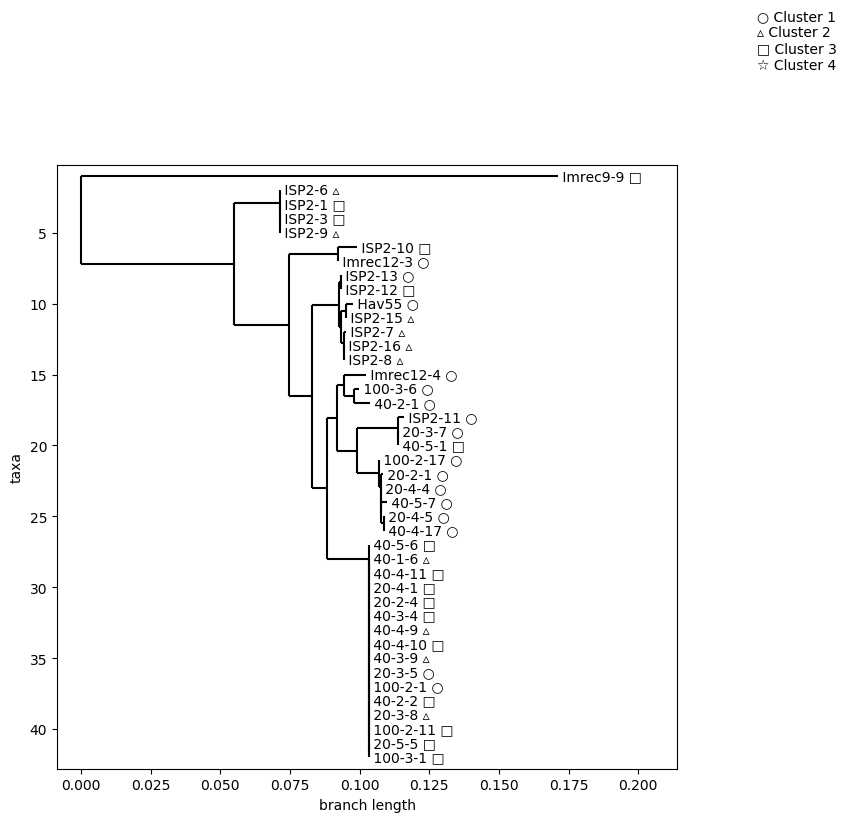

In [19]:
day = ''

toCluster = True

method = 'raxml'

tree = Phylo.read("tree_"+method+".txt", "newick")
labels = ["○", "▵", "□", "☆", "◇", "▦"]

tree.root_at_midpoint()
tree.ladderize()
for clade in tree.find_clades():
    for i in range(len(dataAll)):
        lbl = dataAll['sample'][i]
        if toCluster:
            if clade.name != None and clade.name.replace(" ","").replace("-","") in lbl.replace(" ","").replace("-","") :
                cluster = clustersNum.loc[i].item()
                clade.name += " "+labels[cluster]

fig = plt.figure(figsize=(8, 8), dpi=100)
axes = fig.add_subplot(1, 1, 1)
fig.text(1,1,'○ Cluster 1\n▵ Cluster 2\n□ Cluster 3\n☆ Cluster 4')
Phylo.draw(tree, axes=axes)